Section B: Question No:2 (10 marks)
Create a convolutional neural network from scratch. Please consider it as a baseline. Dataset is available under the folder “3_food_classes”.

Conditions to consider:

--Parameters should not cross 20000

--Should not use more than 3 layers (except input and output)

--Use optimizers like Batch Gradient descent, mini-batch or stochastic

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import glob
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
train_dir="3_food_classes/train/"
test_dir="3_food_classes/test/"

In [4]:
train_files = glob.glob(train_dir + '**/*', recursive=True)
test_files = glob.glob(test_dir + '**/*', recursive=True)

image_extensions = ['jpg', 'jpeg', 'png']
train_files = [file.replace('\\', '/') for file in train_files  if file.split('.')[-1].lower() in image_extensions]
test_files = [file.replace('\\', '/') for file in test_files  if file.split('.')[-1].lower() in image_extensions]

In [13]:
def create_dataframe(filepaths):
    labels = [path.split('/')[-2] for path in filepaths]
    df = pd.DataFrame({'filepath': filepaths, 'label': labels})
    return df.sample(frac=1).reset_index(drop=True)

train_df = create_dataframe(train_files)
test_df = create_dataframe(test_files)

print(f'Total number of train images : {train_df.shape[0]}')
print(f'Total number of test images : {test_df.shape[0]}')
print(f'Total classes are: {train_df["label"].nunique()}')

Total number of train images : 225
Total number of test images : 30
Total classes are: 3


In [9]:
train_df.head()

,filepath,label
0,3_food_classes/train/chicken_curry/78541.jpg,chicken_curry
1,3_food_classes/train/chicken_wings/461442.jpg,chicken_wings
2,3_food_classes/train/chicken_wings/1923909.jpg,chicken_wings
3,3_food_classes/train/chicken_curry/2681181.jpg,chicken_curry
4,3_food_classes/train/chicken_curry/2049685.jpg,chicken_curry


In [20]:
train_image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_image_generator = ImageDataGenerator(rescale=1./255)

target_size = (64, 64)
batch_size = 32

train_data_generator = train_image_generator.flow_from_dataframe(
    dataframe=train_df,     
    x_col='filepath',
    y_col='label',
    target_size=target_size,
    batch_size=batch_size, 
    class_mode='categorical',
    subset='training',
    shuffle=True
    )

validation_data_generator = train_image_generator.flow_from_dataframe(
    dataframe=train_df,     
    x_col='filepath',
    y_col='label',
    target_size=target_size,
    batch_size=batch_size, 
    class_mode='categorical',
    subset='validation',
    shuffle=True
    )

test_data_generator = train_image_generator.flow_from_dataframe(
    dataframe=test_df,     
    x_col='filepath',
    y_col='label',
    target_size=target_size,
    batch_size=batch_size, 
    class_mode='categorical',
    shuffle=False
    )



Found 180 validated image filenames belonging to 3 classes.
Found 45 validated image filenames belonging to 3 classes.
Found 30 validated image filenames belonging to 3 classes.


In [21]:
model = Sequential([
    Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2)),
    Flatten(),
    Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 16)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 3)                 1

In [23]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(train_data_generator, validation_data=validation_data_generator, epochs=20, callbacks=[early_stop])


Epoch 1/20
6/6 [==============================] - 5s 676ms/step - loss: 1.1193 - accuracy: 0.3778 - val_loss: 1.0653 - val_accuracy: 0.4000
Epoch 2/20
6/6 [==============================] - 1s 97ms/step - loss: 1.1050 - accuracy: 0.3500 - val_loss: 1.1154 - val_accuracy: 0.2444
Epoch 3/20
6/6 [==============================] - 1s 99ms/step - loss: 1.1310 - accuracy: 0.3556 - val_loss: 1.0772 - val_accuracy: 0.3778
Epoch 4/20
6/6 [==============================] - 1s 96ms/step - loss: 1.0958 - accuracy: 0.3833 - val_loss: 1.0818 - val_accuracy: 0.3556
Epoch 5/20
6/6 [==============================] - 1s 100ms/step - loss: 1.0875 - accuracy: 0.3833 - val_loss: 1.0979 - val_accuracy: 0.3333
Epoch 6/20
6/6 [==============================] - 1s 99ms/step - loss: 1.0525 - accuracy: 0.4500 - val_loss: 1.0673 - val_accuracy: 0.4667


In [24]:
test_loss, accuracy = model.evaluate(test_data_generator)
print(f'Model accuracy: {accuracy}')

1/1 [==============================] - 0s 94ms/step - loss: 1.1055 - accuracy: 0.3333
Model accuracy: 0.3333333432674408


#### Section B: Question No:3 (20 marks)
Improve the baseline model performance and save the weights of improved model

Conditions to consider:

--Apply Data Augmentation

--No parameter limit

--Can use more than 3 (except input and output)

--Use any optimizers of your choice

--Use callbacks to save the best model weights

In [26]:
train_image_generator = ImageDataGenerator(rescale=1./255, 
                                           validation_split=0.2, 
                                           rotation_range=30, 
                                           width_shift_range=0.2, 
                                           height_shift_range=0.2, 
                                           zoom_range=0.2, 
                                           shear_range=0.2, 
                                           horizontal_flip=True, fill_mode='nearest')

target_size= (128, 128)

train_data_generator = train_image_generator.flow_from_dataframe(
    dataframe=train_df,     
    x_col='filepath',
    y_col='label',
    target_size=target_size,
    batch_size=batch_size, 
    class_mode='categorical',
    subset='training',
    shuffle=True
    )

validation_data_generator = train_image_generator.flow_from_dataframe(
    dataframe=train_df,     
    x_col='filepath',
    y_col='label',
    target_size=target_size,
    batch_size=batch_size, 
    class_mode='categorical',
    subset='validation',
    shuffle=True
    )

test_data_generator = train_image_generator.flow_from_dataframe(
    dataframe=test_df,     
    x_col='filepath',
    y_col='label',
    target_size=target_size,
    batch_size=batch_size, 
    class_mode='categorical',
    shuffle=False
    )


Found 180 validated image filenames belonging to 3 classes.
Found 45 validated image filenames belonging to 3 classes.
Found 30 validated image filenames belonging to 3 classes.


In [27]:
model = Sequential()
model.add(Flatten(input_shape=(128, 128, 3)))
model.add(Dense(200, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 49152)             0         
                                                                 
 dense_1 (Dense)             (None, 200)               9830600   
                                                                 
 batch_normalization (Batch  (None, 200)               800       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 batch_normalization_1 (Bat  (None, 100)               400       
 chNormalization)                                     

In [28]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(train_data_generator, validation_data=validation_data_generator, epochs=20, callbacks=[early_stop])

Epoch 1/20
6/6 [==============================] - 3s 304ms/step - loss: 1.5981 - accuracy: 0.3056 - val_loss: 1.4982 - val_accuracy: 0.3778
Epoch 2/20
6/6 [==============================] - 1s 233ms/step - loss: 1.2424 - accuracy: 0.4000 - val_loss: 1.4017 - val_accuracy: 0.3111
Epoch 3/20
6/6 [==============================] - 1s 226ms/step - loss: 1.2927 - accuracy: 0.4167 - val_loss: 1.4997 - val_accuracy: 0.2667
Epoch 4/20
6/6 [==============================] - 1s 230ms/step - loss: 1.3552 - accuracy: 0.3500 - val_loss: 1.5223 - val_accuracy: 0.2667
Epoch 5/20
6/6 [==============================] - 1s 229ms/step - loss: 1.3049 - accuracy: 0.3611 - val_loss: 1.3131 - val_accuracy: 0.3111
Epoch 6/20
6/6 [==============================] - 1s 233ms/step - loss: 1.2657 - accuracy: 0.3667 - val_loss: 1.2867 - val_accuracy: 0.3333
Epoch 7/20
6/6 [==============================] - 1s 231ms/step - loss: 1.2287 - accuracy: 0.3889 - val_loss: 1.3961 - val_accuracy: 0.2667
Epoch 8/20
6/6 [====

In [29]:
loss, accuracy = model.evaluate(test_data_generator)
print(f'Model accuracy after optimization: {accuracy}')

1/1 [==============================] - 0s 180ms/step - loss: 1.1769 - accuracy: 0.3667
Model accuracy after optimization: 0.36666667461395264


#### Section C: Question 4:

Use the Transfer learning technique to improve the previous section model’s classification performance.

The pre-trained models weights are given to you. The architecture of pre-trained model till convolution layers and its corresponding weights are already saved under the folder ‘base_model’. The given model convolution layers already freezed. Load these weights along with architecture using the following syntax:

cust_model=tf.keras.models.load_model("base_model") 

“base_model” is the folder name under all the required models files are exist. 

Design the remaining layers of network in your own way (from flattening to output layer) and train only its weights with the dataset given.

In [35]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, GlobalAveragePooling2D, Input, BatchNormalization, Dropout, ReLU
from tensorflow.keras.callbacks import EarlyStopping
import glob
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
train_dir="3_food_classes/train/"
test_dir="3_food_classes/test/"

In [31]:
base_model = tf.keras.models.load_model('base_model')
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1_pad (ZeroPadding2D)   (None, 225, 225, 3)          0         ['input_3[0][0]']             
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['Conv1_pad[0][0]']           
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                           

 rmalization)                                                                                     
                                                                                                  
 block_3_expand_relu (ReLU)  (None, 56, 56, 144)          0         ['block_3_expand_BN[0][0]']   
                                                                                                  
 block_3_pad (ZeroPadding2D  (None, 57, 57, 144)          0         ['block_3_expand_relu[0][0]'] 
 )                                                                                                
                                                                                                  
 block_3_depthwise (Depthwi  (None, 28, 28, 144)          1296      ['block_3_pad[0][0]']         
 seConv2D)                                                                                        
                                                                                                  
 block_3_d

 seConv2D)                                                                                        
                                                                                                  
 block_6_depthwise_BN (Batc  (None, 14, 14, 192)          768       ['block_6_depthwise[0][0]']   
 hNormalization)                                                                                  
                                                                                                  
 block_6_depthwise_relu (Re  (None, 14, 14, 192)          0         ['block_6_depthwise_BN[0][0]']
 LU)                                                                                              
                                                                                                  
 block_6_project (Conv2D)    (None, 14, 14, 64)           12288     ['block_6_depthwise_relu[0][0]
                                                                    ']                            
          

 block_9_project_BN (BatchN  (None, 14, 14, 64)           256       ['block_9_project[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_9_add (Add)           (None, 14, 14, 64)           0         ['block_8_add[0][0]',         
                                                                     'block_9_project_BN[0][0]']  
                                                                                                  
 block_10_expand (Conv2D)    (None, 14, 14, 384)          24576     ['block_9_add[0][0]']         
                                                                                                  
 block_10_expand_BN (BatchN  (None, 14, 14, 384)          1536      ['block_10_expand[0][0]']     
 ormalization)                                                                                    
          

 block_13_expand_BN (BatchN  (None, 14, 14, 576)          2304      ['block_13_expand[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_13_expand_relu (ReLU  (None, 14, 14, 576)          0         ['block_13_expand_BN[0][0]']  
 )                                                                                                
                                                                                                  
 block_13_pad (ZeroPadding2  (None, 15, 15, 576)          0         ['block_13_expand_relu[0][0]']
 D)                                                                                               
                                                                                                  
 block_13_depthwise (Depthw  (None, 7, 7, 576)            5184      ['block_13_pad[0][0]']        
 iseConv2D

                                                                                                  
 block_16_depthwise (Depthw  (None, 7, 7, 960)            8640      ['block_16_expand_relu[0][0]']
 iseConv2D)                                                                                       
                                                                                                  
 block_16_depthwise_BN (Bat  (None, 7, 7, 960)            3840      ['block_16_depthwise[0][0]']  
 chNormalization)                                                                                 
                                                                                                  
 block_16_depthwise_relu (R  (None, 7, 7, 960)            0         ['block_16_depthwise_BN[0][0]'
 eLU)                                                               ]                             
                                                                                                  
 block_16_

In [33]:
for layer_number, layer in enumerate(base_model.layers):
    print(layer_number, layer, layer.trainable)

0 <keras.src.engine.input_layer.InputLayer object at 0x0000012DE8483280> True
1 <keras.src.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x0000012DE83657C0> False
2 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x0000012DEECA7700> False
3 <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x0000012DEEC81820> False
4 <keras.src.layers.activation.relu.ReLU object at 0x0000012DEEC81D30> False
5 <keras.src.layers.convolutional.depthwise_conv2d.DepthwiseConv2D object at 0x0000012DEEC9CC40> False
6 <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x0000012DEEC9C130> False
7 <keras.src.layers.activation.relu.ReLU object at 0x0000012DEEC9CD90> False
8 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x0000012DEECB8070> False
9 <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x0000012DEECADEB0> False
10 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x0000012DEECADD

In [32]:
train_image_generator = ImageDataGenerator(rescale=1./255, 
                                           validation_split=0.2, 
                                           rotation_range=30, 
                                           width_shift_range=0.2, 
                                           height_shift_range=0.2, 
                                           zoom_range=0.2, 
                                           shear_range=0.2, 
                                           horizontal_flip=True, fill_mode='nearest',
                                           preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input)

test_image_generator = ImageDataGenerator(rescale=1./255, 
                                          preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input)

target_size= (224, 224)

train_data_generator = train_image_generator.flow_from_dataframe(
    dataframe=train_df,     
    x_col='filepath',
    y_col='label',
    target_size=target_size,
    batch_size=batch_size, 
    class_mode='categorical',
    subset='training',
    shuffle=True
    )

validation_data_generator = train_image_generator.flow_from_dataframe(
    dataframe=train_df,     
    x_col='filepath',
    y_col='label',
    target_size=target_size,
    batch_size=batch_size, 
    class_mode='categorical',
    subset='validation',
    shuffle=True
    )

test_data_generator = train_image_generator.flow_from_dataframe(
    dataframe=test_df,     
    x_col='filepath',
    y_col='label',
    target_size=target_size,
    batch_size=batch_size, 
    class_mode='categorical',
    shuffle=False
    )


Found 180 validated image filenames belonging to 3 classes.
Found 45 validated image filenames belonging to 3 classes.
Found 30 validated image filenames belonging to 3 classes.


In [39]:
from tensorflow.keras.models import Model

inputs = Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
p = GlobalAveragePooling2D()(x)
outputs = Dense(3, activation='softmax')(p)
model = Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_7 (Dense)             (None, 3)                 3843      
                                                                 
Total params: 2261827 (8.63 MB)
Trainable params: 3843 (15.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [44]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, min_delta=0.01)
model_checkpoint = ModelCheckpoint('best_transfer_model', monitor='val_loss', save_best_only=True)

history = model.fit(train_data_generator, validation_data= validation_data_generator, epochs=3, callbacks=[early_stop])

Epoch 1/3
6/6 [==============================] - 8s 1s/step - loss: 1.1544 - accuracy: 0.2944 - val_loss: 1.0951 - val_accuracy: 0.3778
Epoch 2/3
6/6 [==============================] - 5s 782ms/step - loss: 1.1496 - accuracy: 0.3500 - val_loss: 1.1067 - val_accuracy: 0.3333
Epoch 3/3
6/6 [==============================] - 5s 780ms/step - loss: 1.1174 - accuracy: 0.3500 - val_loss: 1.1764 - val_accuracy: 0.2667


In [45]:
test_loss, test_accuracy = model.evaluate(test_data_generator)
print(f"Test Accuracy: {test_accuracy:.4f}")

1/1 [==============================] - 1s 749ms/step - loss: 1.1472 - accuracy: 0.3333
Test Accuracy: 0.3333


#### Section C: Question 5:    (15 Marks)

Develop a Semantic segmentation model using Unet architecture on the given dataset.

Dataset contains the images and the corresponding masks. Find the dataset under the folder “Unet_Dataset”. Note that the masks are binary. Define the architecture accordingly.

Students can make use of pre-trained Unet segmentation model using the library

import segmentation_models as sm

Hints

1. Load all the images in one array of size 150x128x128x3
    Where 150 is total number of trained images
    128x128x3 is each image size
2. Load all the masks in one array of size 150x128x128x1
3. Scale both the above two arrays
4. Split the data into train and test
5. Define the pre-trained segmentation model
6. Compile with appropriate loss and metric and fit the data into it.

Run the model for minimum 5 epochs and present your result. The solution will be evaluated based on approach only as it take lot of epochs to produce good result. 


In [43]:
!pip install git+https://github.com/qubvel/segmentation_models

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/qubvel/segmentation_models to c:\users\hiran\appdata\local\temp\pip-req-build-7dd6gxel
  Resolved https://github.com/qubvel/segmentation_models to commit 5d24bbfb28af6134e25e2c0b79e7727f6c0491d0
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: efficientnet
    Found existing installation: efficientnet 1.0.0
    Uninstalling efficientnet-1.0.0:
      Successfully uninstalled efficientnet-1.0.0


  Running command git clone --filter=blob:none --quiet https://github.com/qubvel/segmentation_models 'C:\Users\Hiran\AppData\Local\Temp\pip-req-build-7dd6gxel'
  Running command git submodule update --init --recursive -q
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
segmentation-models 1.0.1 requires efficientnet==1.0.0, but you have efficientnet 1.1.1 which is incompatible.


In [46]:
import os
import cv2
from PIL import Image
import tensorflow as tf
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

# Set environment variable for segmentation_models to use tf.keras
os.environ["SM_FRAMEWORK"] = "tf.keras"

from tensorflow import keras
import segmentation_models as sm
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import normalize

# Directories
image_dir = 'Unet_Dataset/images/'
mask_dir = 'Unet_Dataset/MASKS_BW/'

Segmentation Models: using `tf.keras` framework.


In [49]:
size = 128

image_dataset=[]
mask_dataset=[]

images = os.listdir(image_dir)
for i, image_name in enumerate(images):
    if (image_name.split('.')[-1] == 'png'):
        image = cv2.imread(image_dir + image_name, cv2.IMREAD_COLOR)
        image = Image.fromarray(image)
        image = image.resize((size, size))
        image_dataset.append(np.array(image))
        
masks = os.listdir(mask_dir)
for i, mask_name in enumerate(masks):
    if(mask_name.split('.')[-1] == 'png'):
        mask = cv2.imread(mask_dir+mask_name, cv2.IMREAD_GRAYSCALE)
        mask = Image.fromarray(mask)
        mask = mask.resize((size, size))
        mask_dataset.append(np.array(mask))      
    

In [50]:
image_dataset = np.array(image_dataset)
image_dataset.shape

(150, 128, 128, 3)

In [51]:
mask_dataset = np.array(mask_dataset)
mask_dataset = np.where(mask_dataset > 0, 1, 0).astype('float32')
mask_dataset = np.expand_dims(mask_dataset, 3)
mask_dataset.shape

(150, 128, 128, 1)

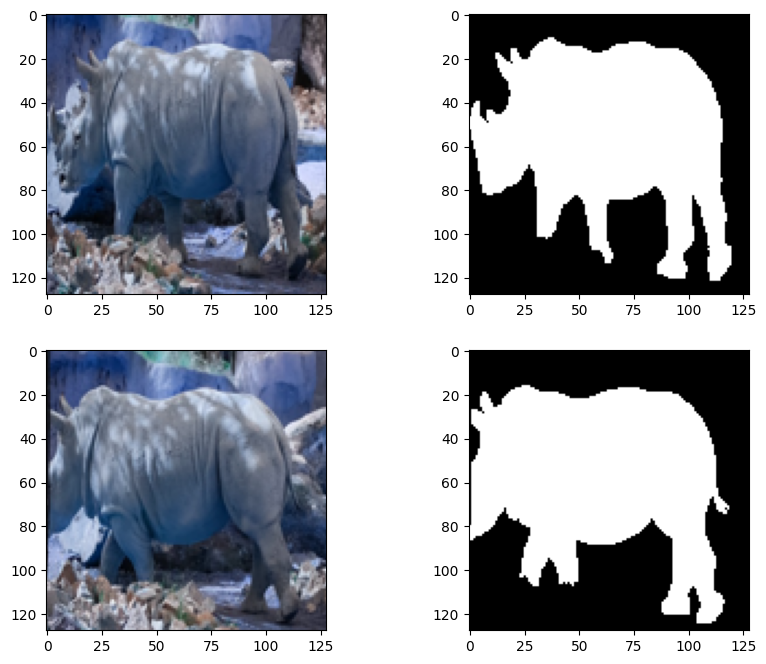

In [53]:
r1 = np.random.randint(1, 150, size=(1, 2))
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(image_dataset[r1[0][0], :, :, :])
plt.subplot(2, 2, 2)
plt.imshow(mask_dataset[r1[0][0], :, :, :], cmap='gray')
plt.subplot(2, 2, 3)
plt.imshow(image_dataset[r1[0][1], :, :, :])
plt.subplot(2, 2, 4)
plt.imshow(mask_dataset[r1[0][1], :, :, :], cmap='gray')

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image_dataset, mask_dataset, test_size=0.2, random_state=43)

In [56]:
backbone= 'resnet34'
preprocessing_input = sm.get_preprocessing(backbone)
x_train_preprocessed = preprocessing_input(x_train)
x_test_preprocessed = preprocessing_input(x_test)

In [57]:
tf.keras.backend.clear_session()

model = sm.Unet(backbone_name=backbone, encoder_weights=None, input_shape=(size, size, 3), classes=1, activation='sigmoid')
model.compile(optimizer='adam', loss=sm.losses.bce_jaccard_loss, metrics=[sm.metrics.iou_score])

history = model.fit(x_train_preprocessed, y_train, batch_size=2, epochs=20, validation_data=(x_test_preprocessed, y_test))

Epoch 1/20
60/60 [==============================] - 41s 505ms/step - loss: 1.2137 - iou_score: 0.2196 - val_loss: 315979.8438 - val_iou_score: 0.2183
Epoch 2/20
60/60 [==============================] - 29s 485ms/step - loss: 1.0284 - iou_score: 0.3130 - val_loss: 114.8960 - val_iou_score: 0.2171
Epoch 3/20
60/60 [==============================] - 29s 480ms/step - loss: 0.9056 - iou_score: 0.3969 - val_loss: 33.4858 - val_iou_score: 0.2248
Epoch 4/20
60/60 [==============================] - 29s 479ms/step - loss: 0.8107 - iou_score: 0.4694 - val_loss: 1170.7906 - val_iou_score: 0.2163
Epoch 5/20
60/60 [==============================] - 29s 483ms/step - loss: 0.8425 - iou_score: 0.4499 - val_loss: 42.2233 - val_iou_score: 0.2428
Epoch 6/20
60/60 [==============================] - 29s 484ms/step - loss: 0.7241 - iou_score: 0.5205 - val_loss: 20.1401 - val_iou_score: 0.2358
Epoch 7/20
60/60 [==============================] - 29s 484ms/step - loss: 0.6560 - iou_score: 0.5607 - val_loss: 2.0

In [66]:
n1 = np.random.randint(0, len(x_test))
test_image = x_test_preprocessed[n1]
test_image_input = np.expand_dims(test_image, axis=0)
print(test_image_input.shape)

predicted_image = model.predict(test_image_input)
print(predicted_image.shape)
predicted_image = (predicted_image[0, :, :, 0] > 0.5).astype(np.uint8)

(1, 128, 128, 3)
1/1 [==============================] - 0s 72ms/step
(1, 128, 128, 1)


In [63]:
predicted_image.shape

(128, 128)

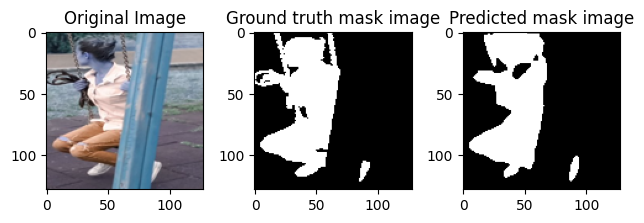

In [67]:
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(test_image[:, :, :])

plt.subplot(1, 3, 2)
plt.title('Ground truth mask image')
plt.imshow(y_test[n1][:, :, :], cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Predicted mask image')
plt.imshow(predicted_image, cmap='gray')

plt.tight_layout()
plt.show()